In [21]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.layers import *
from keras.utils import *
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split

%matplotlib inline

In [22]:

df = pd.read_excel('Concrete_Data.xls')
df.head()
df.describe()

df.columns
df.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'blast',
       'Fly Ash (component 3)(kg in a m^3 mixture)' : 'fly',
       'Water  (component 4)(kg in a m^3 mixture)' : 'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'super',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fine', 
        'Age (day)' : 'age',
       'Concrete compressive strength(MPa, megapascals) ' : 'strength'
    
}, inplace=True)

In [9]:
df.head()

,cement,blast,fly,water,super,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [23]:
X = df.drop(['strength'], axis=1)

Y = df['strength']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X.shape
X

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

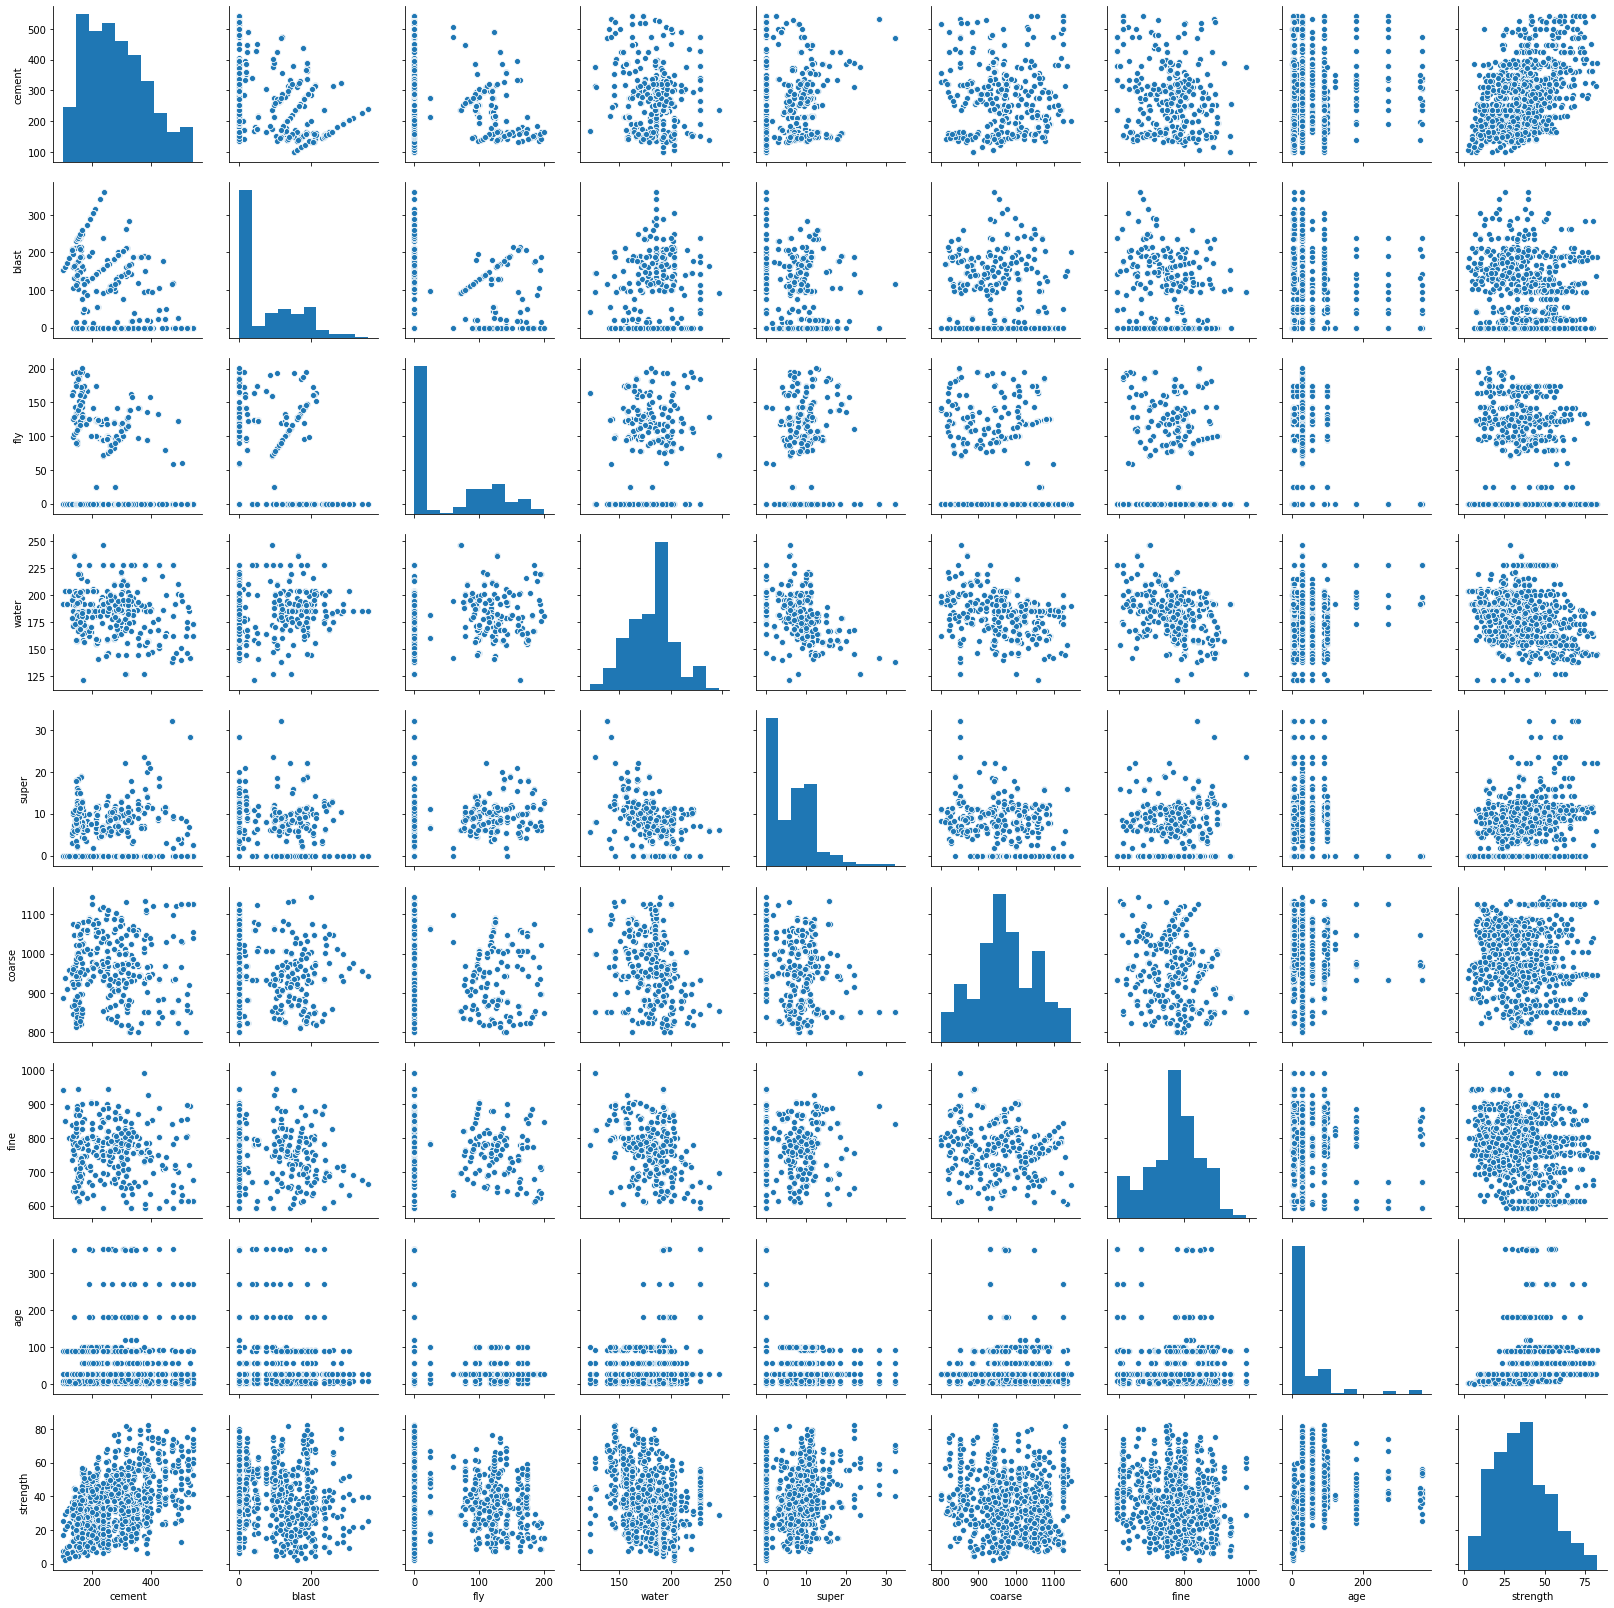

In [16]:
#각속성별 값들을 그래프로 비교해주는 함수
sns.pairplot(df)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

print(X_train)

[[0.31061644 0.         0.47031484 ... 0.43287791 0.63474661 0.07417582]
 [0.48242009 0.40345019 0.         ... 0.58401163 0.23758154 0.07417582]
 [0.64611872 0.         0.         ... 0.47965116 0.42398394 0.01648352]
 ...
 [0.36506849 0.30745687 0.43028486 ... 0.27383721 0.34771701 0.07417582]
 [0.57762557 0.05286589 0.48475762 ... 0.48255814 0.69493226 0.07417582]
 [0.34203196 0.         0.49945027 ... 0.59593023 0.7670848  0.03571429]]


In [39]:

#Regression 은 결과가 1이다.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

#Regression 은 결과가 1이기 때문에 mse를 사용한다.
model.compile(loss='mse', optimizer='adam')
model.summary()



hist = model.fit(X_train, Y_train, epochs=100, validation_split=0.1)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_52 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 39,361
Trainable params: 39,361
Non-trainable params: 0
_________________________________________________________________
Train on 834 samples, validate on 93 samples
Epoch 1/100
834/834 [==============================] - 0s 187us/step - loss: 1422.8814 - val_loss: 1264.7773
Epoch 2/100
834/834 [==============================] - 0s 52us/step - loss: 579.4984 - val_lo

Epoch 70/100
834/834 [==============================] - 0s 51us/step - loss: 39.3365 - val_loss: 43.8079
Epoch 71/100
834/834 [==============================] - 0s 46us/step - loss: 39.6199 - val_loss: 52.5306
Epoch 72/100
834/834 [==============================] - 0s 42us/step - loss: 48.3380 - val_loss: 37.6461
Epoch 73/100
834/834 [==============================] - 0s 44us/step - loss: 40.4274 - val_loss: 40.1828
Epoch 74/100
834/834 [==============================] - 0s 39us/step - loss: 39.2290 - val_loss: 41.2703
Epoch 75/100
834/834 [==============================] - 0s 43us/step - loss: 39.0053 - val_loss: 39.9001
Epoch 76/100
834/834 [==============================] - 0s 42us/step - loss: 37.9353 - val_loss: 40.7926
Epoch 77/100
834/834 [==============================] - 0s 42us/step - loss: 39.7299 - val_loss: 39.2234
Epoch 78/100
834/834 [==============================] - 0s 39us/step - loss: 38.6439 - val_loss: 38.1987
Epoch 79/100
834/834 [==============================] -

In [40]:
score = model.evaluate(X_test, Y_test)
print(score)

103/103 [==============================] - 0s 58us/step
37.48612761266023


In [41]:
pred = model.predict(X_test[-5:])
print(pred)
print(Y_test[-5:])

[[41.97459 ]
 [43.388832]
 [52.860466]
 [25.297916]
 [39.97685 ]]
15     52.908320
51     46.931942
468    52.958652
421    34.239378
76     40.196451
Name: strength, dtype: float64


Text(0.5, 1.0, 'loss')

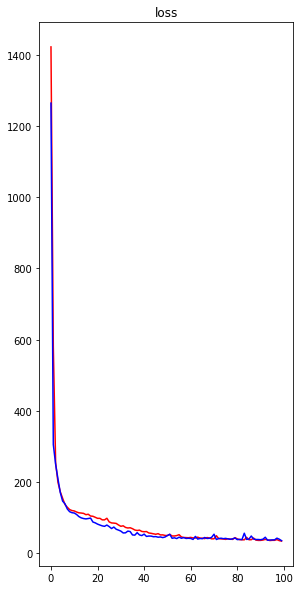

In [44]:

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')